In [1]:
import matplotlib.pyplot as plt
import temp

S_n = 500e3
V_n = 800
I_n = S_n/V_n
Conduction_losses = 0.02*S_n # = A*I_n**2
A = Conduction_losses/(I_n**2)
B = 1*0
C = 0.02*S_n
model = temp.model()
model.ini({'A_D1':A,'B_D1':B,'C_D1':C,'p_r_ref_D1':1500e3,'irrad_D1':800, 'temp_deg_D1':40.0},'xy_0.json')
model.report_u()
model.report_y()
model.report_z()
model.run(1.0,{})
model.run(2.0,{'irrad_D1':900})
model.run(3.0,{'temp_deg_D1':25.0})
model.run(4.0,{'p_r_ref_D1':500e3})
model.run(5.0,{'p_r_ref_D1':1500e3})
model.post();


v_ref_D2 =800.00
irrad_D1 =800.00
temp_deg_D1 =40.00
p_r_ref_D1 =1500000.00
u_freq = 0.00
V_D1_0_r = 403.05
V_D1_0_i = -0.00
V_D1_1_r = -403.05
V_D1_1_i =  0.00
V_D2_0_r = 400.07
V_D2_0_i = -0.00
V_D2_1_r = -400.07
V_D2_1_i =  0.00
v_dc_D1 = 822.28
p_l_D1 = 591171.63
omega_coi =  0.00
p_agc =  1.01
i_l_D1_0_D2_0_r = 705.18
i_l_D1_0_D2_0_i =  0.00
i_l_D1_1_D2_1_r = -705.18
i_l_D1_1_D2_1_i =  0.00
p_h_D2 = -564144.43
p_loss_D1 = 22730.37
i_pv_D1 = 718.94
p_mp_D1 = 591171.63
p_h_D1 = 568441.26
xi_freq = 100.00
u_freq =  0.00


Text(0.5, 0, 'Time (s)')

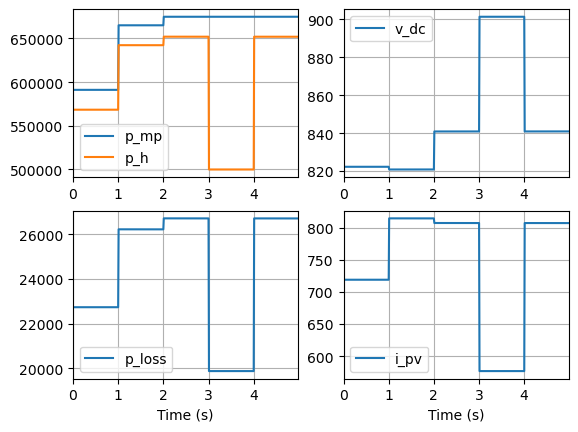

In [3]:
fig,axes = plt.subplots(nrows=2,ncols=2)

axes[0,0].plot(model.Time,model.get_values('p_mp_D1'), label='p_mp')
axes[0,0].plot(model.Time,model.get_values('p_h_D1'), label='p_h')
axes[0,1].plot(model.Time,model.get_values('v_dc_D1'), label='v_dc')
axes[1,0].plot(model.Time,model.get_values('p_loss_D1'), label='p_loss')
axes[1,1].plot(model.Time,model.get_values('i_pv_D1'), label='i_pv')

for ax in axes.flatten():
    ax.grid()
    ax.legend()
    ax.set_xlim(0,model.Time[-1])
axes[1,0].set_xlabel('Time (s)')
axes[1,1].set_xlabel('Time (s)')

In [5]:
import hjson

with open('pv_mpt.hjson') as fobj:
    data = hjson.load(fobj)

data

OrderedDict([('system',
              OrderedDict([('S_base', 1000000),
                           ('K_p_agc', 0),
                           ('K_i_agc', 0),
                           ('K_xif', 0.1),
                           ('phi_deg_default', 0)])),
             ('buses',
              [OrderedDict([('name', 'A1'),
                            ('pos_x', 30),
                            ('pos_y', -20),
                            ('units', 'm'),
                            ('U_kV', 0.4)]),
               OrderedDict([('name', 'A2'),
                            ('pos_x', 30),
                            ('pos_y', -20),
                            ('units', 'm'),
                            ('U_kV', 0.4)])]),
             ('lines',
              [OrderedDict([('bus_j', 'A1'),
                            ('bus_k', 'A2'),
                            ('code', 'UG1'),
                            ('m', 20),
                            ('vsc_line', True),
                            ('monit

In [7]:
data['vscs'][0]['pv']['V_mp']

33.7